In [1]:
#calculating the dark rate on the csvs and applying thresholds
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('000ProcessedData/061125_settling_1900_10000_6_on_processed.csv')

In [2]:
"""
CSV has columns 0 to 12:
(index column)
column 0: baseline
column 1: sd_baseline
column 2: amplitude
column 3: peak_time
column 4: FWHM
column 5: t1_of_FWHM
column 6: t2_of_FWHM
column 7: time_above_3sigma
column 8: first_3sigma_crossing
column 9: second_3sigma_crossing
column 10: integral_pC
column 11: peaks_over_15sigma_threshold
column 12: event_timestamps

"""

'\nCSV has columns 0 to 12:\n(index column)\ncolumn 0: baseline\ncolumn 1: sd_baseline\ncolumn 2: amplitude\ncolumn 3: peak_time\ncolumn 4: FWHM\ncolumn 5: t1_of_FWHM\ncolumn 6: t2_of_FWHM\ncolumn 7: time_above_3sigma\ncolumn 8: first_3sigma_crossing\ncolumn 9: second_3sigma_crossing\ncolumn 10: integral_pC\ncolumn 11: peaks_over_15sigma_threshold\ncolumn 12: event_timestamps\n\n'

<>:20: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\s'
C:\Users\holly\AppData\Local\Temp\ipykernel_51360\661536505.py:20: SyntaxWarning: invalid escape sequence '\s'
  plt.axvline(15, color = 'r', linestyle='--', label = '15$\sigma$')
C:\Users\holly\AppData\Local\Temp\ipykernel_51360\661536505.py:21: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel('Threshold (n*$\sigma$ of baseline)', fontsize=14)


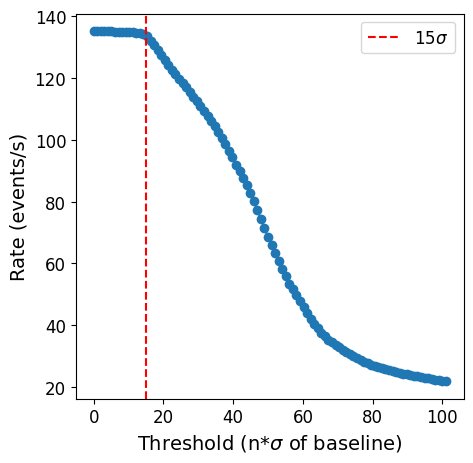

In [4]:

#apply threshold here (n*sigma), 0 to 100 sigma 
threshold_factors = np.linspace(0,101,100)
sigma_column = df['sd_baseline']
amplitude_column = df['amplitude']
timestamp_column = df['event_timestamps']
#find the difference between the first timestamp and final timestamp
timetaken = timestamp_column.iloc[-1] - timestamp_column.iloc[0]

dark_rates = []

for factor in threshold_factors:
    rate = np.sum(amplitude_column > (sigma_column * factor))/timetaken #rate is the sum of all amplitudes passed nsigma over the time taken
    dark_rates.append(rate)

dark_rates = np.array(dark_rates)

#plot dark rate against applied threshold here
plt.figure(figsize=(5, 5))
plt.plot(threshold_factors, dark_rates, marker='o')
plt.axvline(15, color = 'r', linestyle='--', label = '15$\sigma$')
plt.xlabel('Threshold (n*$\sigma$ of baseline)', fontsize=14)
plt.ylabel('Rate (events/s)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()